This notebook should be run on happili-02; that is where the data is.
<br><br>
Before, I had been trying to do everything in a single directory, only updating crosscal in an effort to be clever and save space and processing time. But I'm not confident enough in what is happening, so I will instead just work in two separate directories, I think.
<br><br>
Note that I took a quick look at gain solutions for the work I did before and saw that only RT5 had phase changes, opposite of what I expected. But this might be related to use of reference antenna. So I want to do another, careful reduction, in separate directories, where I use RT5 as reference antenna. This will also let me investigate the issue with phase jumps from selfcal - I think there might be something happening with RT2.

In [1]:
#Image M51 data that is part of logboard test
#Create one log file, even though I will work in two separate directories/cfg files
%config IPCompleter.greedy=True
%matplotlib notebook
import libs.lib as lib
lib.setup_logger('info', logfile='/home/adams/apertif/MISC/logs/M51_LO.log')
import apercal

/home/apercal/pipeline/local/lib/python2.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa
root - INFO : Logging started!
root - INFO : To see the log in a bash window use the following command:
root - INFO : tail -n +1 -f /home/adams/apertif/MISC/logs/M51_LO.log


Setup logger with lib.setup_logger()


Looking at M51 data from weekend of 23 March. Did 3 calibrator scans before and after, switching LO values. Will first calibrate/image with calibrator right next to M51. Then will do outermost calibrators that have same LO but should have different frequencies, except for RT5 and RT6. Except need to remember that RT6 didn't work so it's not in the array. Also need to remember that source names are not correct, so I want to make sure and update them myself before doing calibration.

Skip the prepare steps as I copied data over manually before transfer was finished. Now I'll reset, copying raw to two different working folders, but I know that I've also already done the flagging. And then for the first directory (M51_LO_good), reset everything that is after raw

In [2]:
cfggood = '/home/adams/apertif/MISC/cfg/M51_LO_good.cfg'
cfgbad = '/home/adams/apertif/MISC/cfg/M51_LO_bad.cfg'

In [3]:
ccal = apercal.ccal(cfggood)
ccal.reset()

scal = apercal.scal(cfggood)
scal.reset()

CROSSCAL - INFO : ### Configuration file /home/adams/apertif/MISC/cfg/M51_LO_good.cfg successfully read! ###
CROSSCAL - WARNING : ### Deleting all cross calibrated data. ###
CROSSCAL - INFO : # Moved to directory /data/adams/apertif/M51_LO/00/crosscal #
SELFCAL - INFO : ### Configuration file /home/adams/apertif/MISC/cfg/M51_LO_good.cfg successfully read! ###
SELFCAL - WARNING : ### Deleting all self-calibrated data. ###
SELFCAL - INFO : # Moved to directory /data/adams/apertif/M51_LO/00/selfcal #


In [6]:
convertgood = apercal.convert(cfggood)
convertbad = apercal.convert(cfgbad)
convertgood.go()
convertbad.go()

CONVERT - INFO : ### Configuration file /home/adams/apertif/MISC/cfg/M51_LO_good.cfg successfully read! ###
CONVERT - INFO : ### Configuration file /home/adams/apertif/MISC/cfg/M51_LO_bad.cfg successfully read! ###
CONVERT - INFO : ########## FILE CONVERSION started ##########
CONVERT - INFO : ### Starting conversion from MS to UVFITS format ###
CONVERT - INFO : ### Converted MS file 3C196.MS to UVFITS format! ###
CONVERT - INFO : ### Converted MS file /data/adams/apertif/M51_LO/00/raw/M51.MS to UVFITS format! ###
CONVERT - INFO : ### Conversion from MS to UVFITS format done! ###
CONVERT - INFO : ### Starting conversion from UVFITS to MIRIAD format ###
CONVERT - INFO : ### Converted UVFITS file 3C196.MS to MIRIAD format! ###
CONVERT - INFO : ### Converted UVFITS file /data/adams/apertif/M51_LO/00/crosscal/M51.UVFITS to MIRIAD format! ###
CONVERT - INFO : ### Conversion from UVFITS to MIRIAD format done! ###
CONVERT - INFO : ########## FILE CONVERSION done ##########
CONVERT - INFO : ##

In [7]:
#Now do the crosscal for both
ccalgood = apercal.ccal(cfggood)
ccalbad = apercal.ccal(cfgbad)

#Except, looks like I'm not allowed to manually select my reference antenna. Boo!

#so do bandpass/delay calibration manually, then use apercal to transfer to target

import subs.setinit
from libs import lib
import os
import sys


subs.setinit.setinitdirs(ccalgood)
subs.setinit.setdatasetnamestomiriad(ccalgood)
ccalgood.director('ch', ccalgood.crosscaldir)
ccalgood.logger.info('### Bandpass calibration on the flux calibrator data started ###')
mfcal = lib.miriad('mfcal')
mfcal.vis = ccalgood.fluxcal
print ccalgood.fluxcal
mfcal.stokes = 'ii'
mfcal.refant = '4'   #RT5
mfcal.options = 'delay'
mfcal.interval = 1000
mfcal.go()
ccalgood.logger.info('### Bandpass calibration on the flux calibrator data done ###')



subs.setinit.setinitdirs(ccalbad)
subs.setinit.setdatasetnamestomiriad(ccalbad)
ccalbad.director('ch', ccalbad.crosscaldir)
ccalbad.logger.info('### Bandpass calibration on the flux calibrator data started ###')
mfcal = lib.miriad('mfcal')
mfcal.vis = ccalbad.fluxcal
mfcal.stokes = 'ii'
mfcal.refant = '4'   #RT5
mfcal.options = 'delay'
mfcal.interval = 1000
mfcal.go()
ccalbad.logger.info('### Bandpass calibration on the flux calibrator data done ###')


CROSSCAL - INFO : ### Configuration file /home/adams/apertif/MISC/cfg/M51_LO_good.cfg successfully read! ###
CROSSCAL - INFO : ### Configuration file /home/adams/apertif/MISC/cfg/M51_LO_bad.cfg successfully read! ###
CROSSCAL - INFO : # Moved to directory /data/adams/apertif/M51_LO/00/crosscal #
CROSSCAL - INFO : ### Bandpass calibration on the flux calibrator data started ###


3C196.mir


CROSSCAL - INFO : ### Bandpass calibration on the flux calibrator data done ###
CROSSCAL - INFO : # Moved to directory /data/adams/apertif/M51_LO_bad/00/crosscal #
CROSSCAL - INFO : ### Bandpass calibration on the flux calibrator data started ###
CROSSCAL - INFO : ### Bandpass calibration on the flux calibrator data done ###


In [8]:
#and now transfer the solutions

ccalgood.transfer_to_target()
ccalbad.transfer_to_target()

CROSSCAL - INFO : # Moved to directory /data/adams/apertif/M51_LO/00/crosscal #
CROSSCAL - INFO : ### Copying calibrator solutions to target dataset ###
CROSSCAL - INFO : # Copying calibrator solutions (bandpass, gains) from flux calibrator #
CROSSCAL - INFO : # Polarisation calibration solutions (leakage, angle) not found #
CROSSCAL - INFO : # Copying calibrator solutions to 1 beams! #
CROSSCAL - INFO : # Calibrator solutions copied to beam 00! #
CROSSCAL - INFO : ### All solutions copied to target data set(s) ###
CROSSCAL - INFO : # Moved to directory /data/adams/apertif/M51_LO_bad/00/crosscal #
CROSSCAL - INFO : ### Copying calibrator solutions to target dataset ###
CROSSCAL - INFO : # Copying calibrator solutions (bandpass, gains) from flux calibrator #
CROSSCAL - INFO : # Polarisation calibration solutions (leakage, angle) not found #
CROSSCAL - INFO : # Copying calibrator solutions to 1 beams! #
CROSSCAL - INFO : # Calibrator solutions copied to beam 00! #
CROSSCAL - INFO : ### A

In [9]:
#and now do the selfcal
#do with parametric first, which is default in cfgfile, so that's fine

scalgood = apercal.scal(cfggood)
scalbad = apercal.scal(cfgbad)

scalgood.show()
scalbad.show()

SELFCAL - INFO : ### Configuration file /home/adams/apertif/MISC/cfg/M51_LO_good.cfg successfully read! ###
SELFCAL - INFO : ### Configuration file /home/adams/apertif/MISC/cfg/M51_LO_bad.cfg successfully read! ###


SELFCAL
	selfcal_image_imsize = 2049
	selfcal_image_cellsize = 4
	selfcal_splitdata = True
	selfcal_splitdata_chunkbandwidth = 0.02
	selfcal_splitdata_channelbandwidth = 0.001
	selfcal_flagantenna = 
	selfcal_flagline = True
	selfcal_flagline_sigma = 0.5
	selfcal_parametric = True
	selfcal_parametric_skymodel_radius = 0.5
	selfcal_parametric_skymodel_cutoff = 0.8
	selfcal_parametric_skymodel_distance = 30
	selfcal_parametric_solint = 5
	selfcal_parametric_uvmin = 0.5
	selfcal_parametric_uvmax = 1000
	selfcal_parametric_amp = False
	selfcal_standard_majorcycle = 3
	selfcal_standard_majorcycle_function = square
	selfcal_standard_minorcycle = 5
	selfcal_standard_minorcycle_function = square
	selfcal_standard_c0 = 10.0
	selfcal_standard_c1 = 5.0
	selfcal_standard_minorcycle0_dr = 3.0
	selfcal_standard_drinit = 25
	selfcal_standard_dr0 = 2.0
	selfcal_standard_nsigma = 50
	selfcal_standard_uvmin = [0.0, 0.0, 0.0]
	selfcal_standard_uvmax = [3000, 3000, 3000]
	selfcal_standard_solint = [5, 3, 

In [ ]:
scalbad.go()
scalgood.go()

SELFCAL - INFO : ########## Starting SELF CALIBRATION ##########
SELFCAL - INFO : # Creating directory /data/adams/apertif/M51_LO_bad/00/selfcal #
SELFCAL - INFO : # Moved to directory /data/adams/apertif/M51_LO_bad/00/selfcal #
SELFCAL - INFO : ### Splitting of target data into individual frequency chunks started ###
SELFCAL - INFO : # Applying calibrator solutions to target data before averaging #
SELFCAL - INFO : # Calibrator solutions to target data applied #
SELFCAL - INFO : # Found 1 subband(s) in target data #
SELFCAL - INFO : # Started splitting of subband 0 #
SELFCAL - INFO : # Adjusting chunk size to 0.016796875 GHz for regular gridding of the data chunks over frequency #
SELFCAL - INFO : # Starting splitting of data chunk 0 for subband 0 #
SELFCAL - INFO : # Increasing frequency bin of data chunk 0 to keep bandwidth of chunks equal over the whole bandwidth #
SELFCAL - INFO : # New frequency bin is 0.0010498046875 GHz #
SELFCAL - INFO : # Creating directory /data/adams/aperti

root - INFO : ### Using standard WSRT beam for calculating apparent fluxes! ###
root - INFO : ### Field seems to have a flux of 0.35147052972826415 Jy ###
root - INFO : ### Found 28 source(s) in the model at a cutoff of 80.0 percent with a total flux of 0.28286898667643195 Jy ###
root - INFO : ### Wrote source textfile to /data/adams/apertif/M51_LO_bad/00/selfcal/01/pm/model.txt! ###
SELFCAL - INFO : # Creating model from textfile model.txt for chunk 01 #
SELFCAL - INFO : # Doing parametric self-calibration on chunk 01 with solution interval 5 min and uvrange limits of 0.5~1000 klambda #
SELFCAL - INFO : # Parametric self calibration routine on chunk 01 done! #
SELFCAL - INFO : # Starting parametric self calibration routine on chunk 02 #
SELFCAL - INFO : # Moved to directory /data/adams/apertif/M51_LO_bad/00/selfcal/02 #
SELFCAL - INFO : # Creating directory /data/adams/apertif/M51_LO_bad/00/selfcal/02/pm #
root - INFO : ### Found 65 source(s) with no counterparts. Setting their spectr

SELFCAL - INFO : # Moved to directory /data/adams/apertif/M51_LO_bad/00/selfcal/00 #
SELFCAL - INFO : # Theoretical noise for chunk 00 is 3.58e-05 Jy/beam #
SELFCAL - INFO : # Your theoretical noise threshold will be 50 times the theoretical noise corresponding to 0.00179 Jy/beam #
SELFCAL - INFO : # Your dynamic range limits are set to [25.0, 50.0, 100.0] for the major self-calibration cycles #
SELFCAL - INFO : # Major self-calibration cycle 0 for frequency chunk 00 started #
SELFCAL - INFO : # Creating directory /data/adams/apertif/M51_LO_bad/00/selfcal/00/00 #
SELFCAL - INFO : # The minor cycle dynamic range limits for major cycle 0 are [3.0, 1.5625, 6.25, 14.0625, 25.0] #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 00 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/0 set to 2.3825221061706543 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 2.3825221061706543 Jy/beam cre

SELFCAL - INFO : # Clean threshold at major/minor cycle 1/3 was set to 0.036292934570312504 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/3 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/3 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/3 created #
SELFCAL - INFO : # Peak of the residual image is 0.28014535 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.05473513 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 00 finished #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 00 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/4 set to 0.1417692756652832 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.1417692756652832 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/4 was set to 0.02835385513305664 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/4 cleaning done #

While I'm running the selfcals, let's look at gain solutions. I used RT5 as reference antenna, so hopefully that's what I'll see.
<br> Use gpplt in miriad to look at phase:
<br>`gpplt vis=3C196.mir device=/xs nxy=4,3 yaxis=phase`
<br>
Then I see:
<img src="img/M51_goodLO_phases_RT5ref.jpg">
<br>
When I then look at "bad" LO data (`gpplt vis=3C196_badLO.mir device=/xs nxy=4,3 yaxis=phase`), I see: <br>
<img src="img/M51_badLO_phases_RT5ref.jpg">
<br><br>
The phase changes that are there are generally small. So hard to say that this is a problem for us. Can look at selfcal solutions, especially later when I do no parameteric model, to see what sort of difference that makes.

<IPython.core.display.Javascript object>


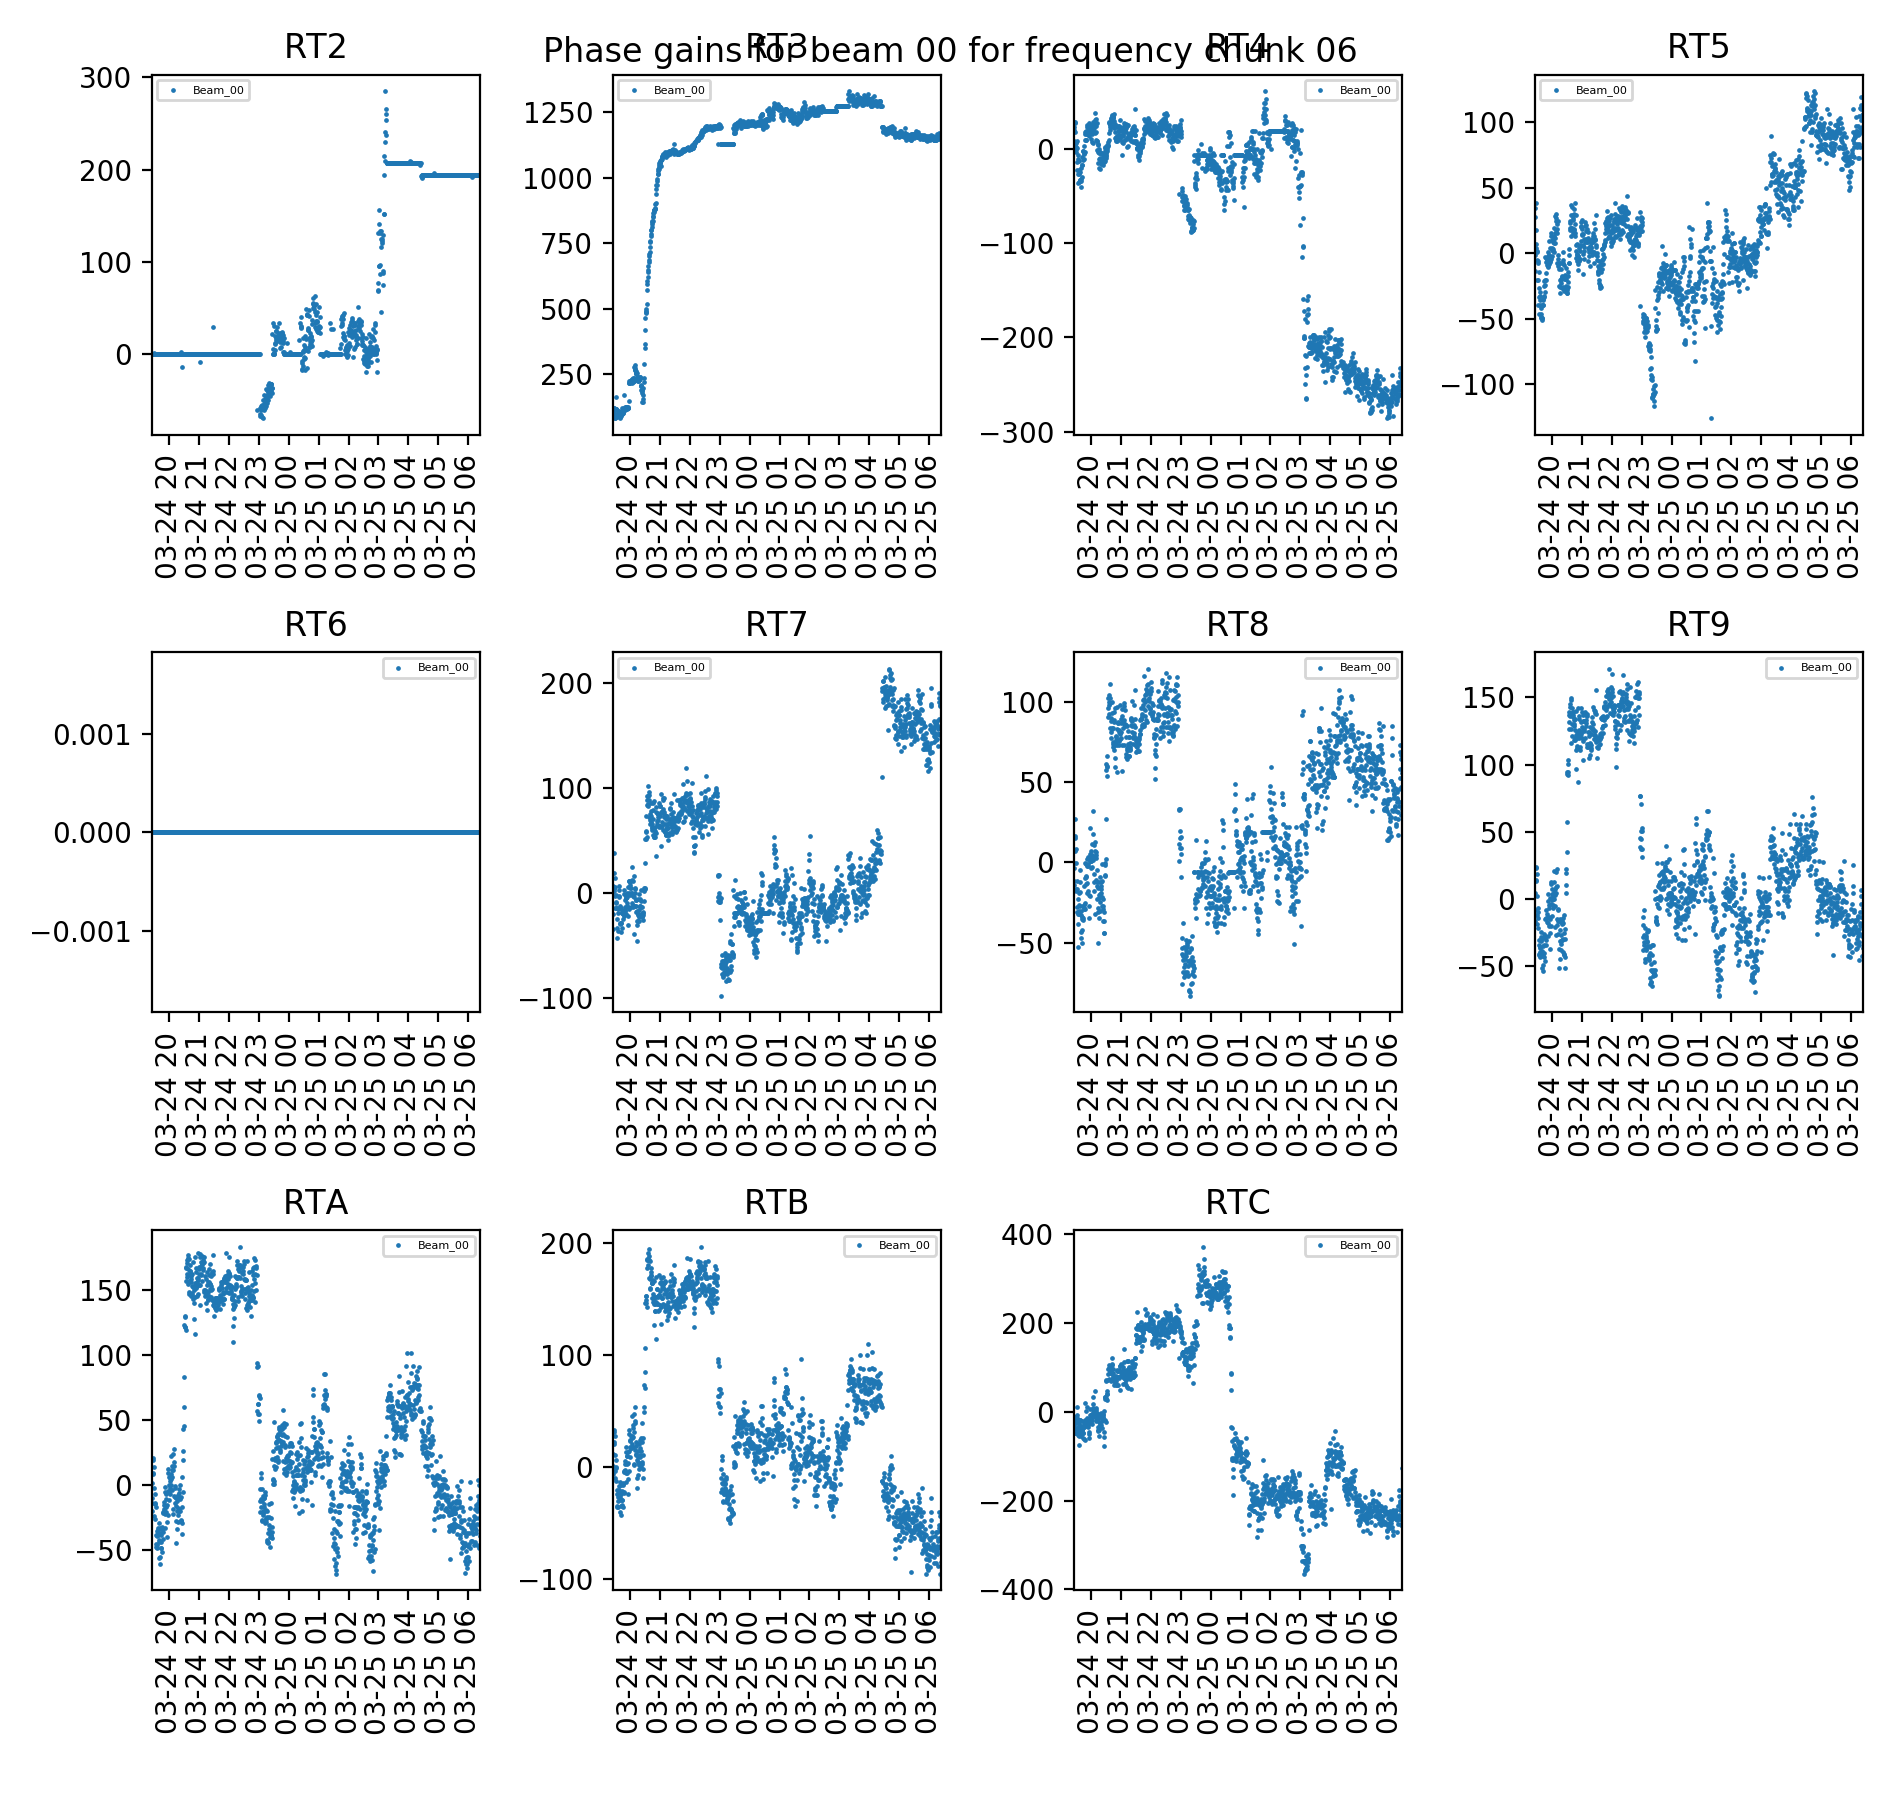

In [17]:
#self calibration finished
#Now plot the gains
import subs.readmirlog
import datetime
import glob
import matplotlib
from matplotlib import pyplot as plt
import numpy as np


import subs

chunk = '06'
tnames = ['RT2','RT3','RT4','RT5','RT6','RT7','RT8','RT9','RTA','RTB','RTC']

subs.setinit.setinitdirs(scal) # Don't forget to initialise the directory structure after changing the beam. For modules this is done automatically.
files = glob.glob(scal.selfcaldir + '/*/*.mir')
gains, times = subs.readmirlog.get_gains(files[int(chunk)])


    
plt.figure(figsize=(9.5,9))
plt.suptitle('Phase gains for beam 00 for frequency chunk ' + chunk, fontsize='large')

for a in range(gains.shape[0]):
    plt.subplot(np.ceil(len(tnames)/4.0), 4, a+1)
    plt.scatter(times, gains[a,:,1], s=0.5, label='Beam_00')
    plt.title(tnames[a])
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.xlim(times[0],times[-1])
    plt.legend(fontsize=4)
    plt.show()
    
plt.savefig('m51_selfcalphases_goodLO.png')